<a href="https://colab.research.google.com/github/ManjuVijayakumar/ICTAK_DSA_June_25/blob/main/Assignment_on_Clustering_DSA_June_25_Manju_Vijayakumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Try out different clustering models in the given dataset. Find the optimum number
of clusters in each model and create the model with the optimum number of
clusters.

In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
data= pd.read_csv('/content/sample_data/Wine_clust.csv')

# First 5 rows of the dataset
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Bottom 5 rows of the dataset
data.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
# Basic information of the dataset

print('Dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))
print('\nBasic information : \n')
print(data.info())

Dataset has 178 rows and 13 columns

Basic information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None


In [ ]:
# Null value checking
data.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [ ]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
# Datatypes
data.dtypes

,0
Alcohol,float64
Malic_Acid,float64
Ash,float64
Ash_Alcanity,float64
Magnesium,int64
Total_Phenols,float64
Flavanoids,float64
Nonflavanoid_Phenols,float64
Proanthocyanins,float64
Color_Intensity,float64


In [ ]:
# Statistical summary
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# Features have different units or ranges. Scaling the dataset

from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler()

In [ ]:
data_scaled= std_scaler.fit_transform(data)

data_scaled= pd.DataFrame(data_scaled, columns= data.columns)
data_scaled.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148


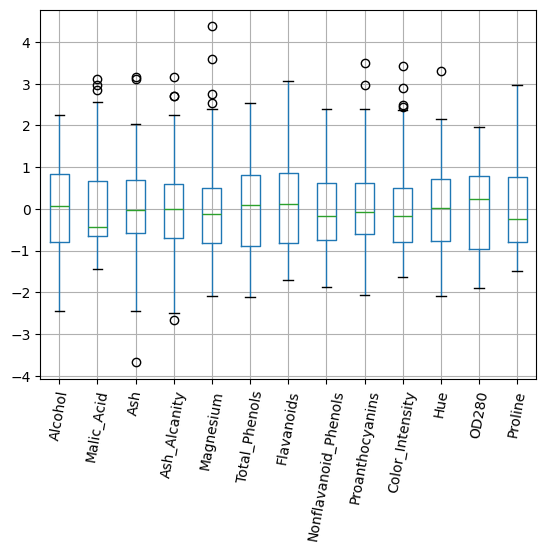

In [40]:
# Check for outliers

data_scaled.boxplot()
plt.xticks(rotation = 80)
plt.show()

## **KMeans**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Elbow method to find optimum number of clusters

wcss= []
for i in range(2, 11):
  clust_kmeans= KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
  clust_kmeans.fit(data_scaled)
  wcss.append(clust_kmeans.inertia_)

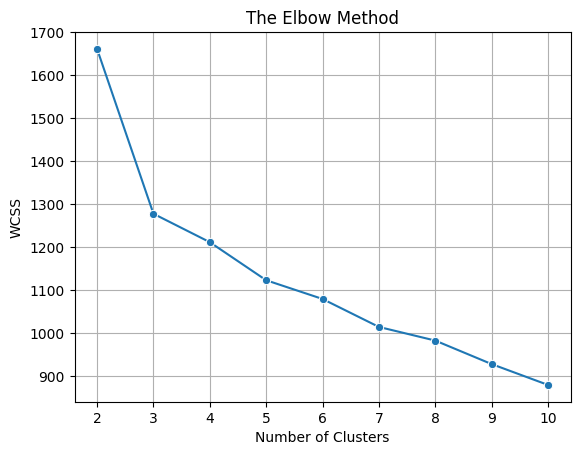

In [ ]:
sns.lineplot(x= range(2, 11), y= wcss, marker= 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

3 number of clusters found to be optimal

In [ ]:
# Predict using number of clusters
clust_kmeans= KMeans(n_clusters= 3, init= 'k-means++', random_state= 42)
y_pred_kmeans= clust_kmeans.fit_predict(data_scaled)
kmeans_labels= clust_kmeans.labels_
y_pred_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
# Using silhouette score to ensure the number of clusters
from sklearn.metrics import silhouette_score

In [ ]:
sil_scores= []

for i in range(2, 11):
  clust_kmeans= KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
  y_pred_kmeans= clust_kmeans.fit_predict(data_scaled)
  sil_score_kmeans= silhouette_score(data_scaled, y_pred_kmeans)
  sil_scores.append(sil_score_kmeans)

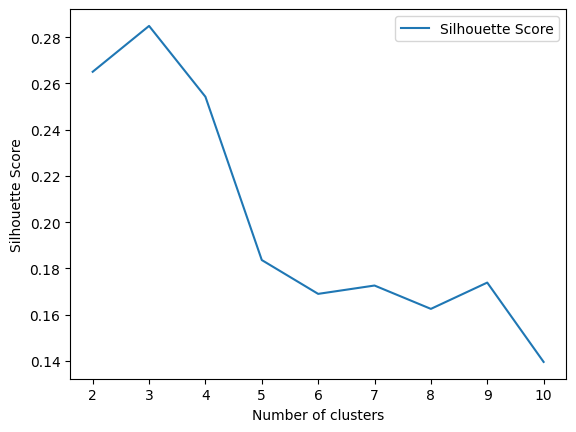

In [ ]:
# Plot the silhouette score

x= range(2, 11)
plt.plot(x, sil_scores, label= 'Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


In [ ]:
sil_scores

[np.float64(0.2650328591008738),
 np.float64(0.2848589191898987),
 np.float64(0.25422758316007776),
 np.float64(0.18362105107698137),
 np.float64(0.16899191019013057),
 np.float64(0.1726015561094921),
 np.float64(0.16250411307671142),
 np.float64(0.1738739334545086),
 np.float64(0.13956723664297546)]

In [ ]:
# Appending clusters to the original dataset

data['Clusters_kmeans3']= kmeans_labels

clust_profile= data.groupby('Clusters_kmeans3').mean()
clust_profile['freq'] = data.Clusters_kmeans3.value_counts().sort_index()
clust_profile


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,freq
Clusters_kmeans3,,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,65
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,51
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,62


**Insights from KMeans**


*   Optimal number of clusters found to be 3
*   Silhouette score of 0.28 indicate acceptable but not ideal clustering
*   Clustering profile shows the clusters have been distinguished based on each feature.





## Agglomerative Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
# Plot dendrogram for finding the number of clusters

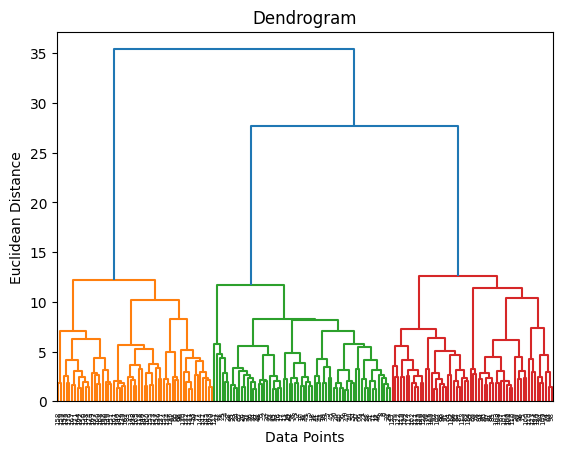

In [ ]:
dendrogram= sch.dendrogram(sch.linkage(data_scaled, method= 'ward'))
# ward method minimizes the total within-cluster variance

plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

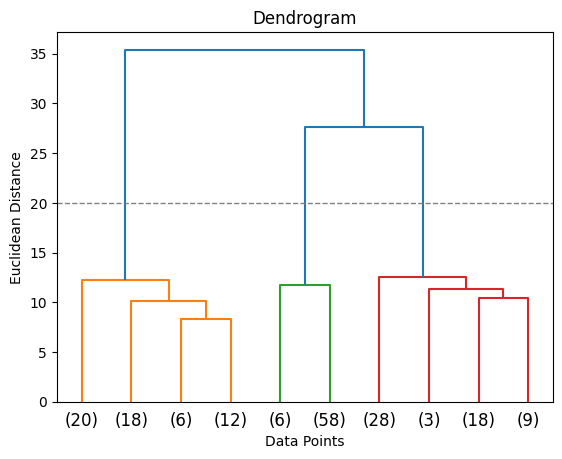

In [ ]:
dendrogram= sch.dendrogram(sch.linkage(data_scaled, method= 'ward'), truncate_mode= 'lastp', p= 10)
plt.title('Dendrogram')
plt.axhline(y= 20, c= 'grey', lw= 1, linestyle ='dashed')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

3 clusters found to be optimal as per dendrogram.

In [ ]:
# Prediction using 3 number of clusters

from sklearn.cluster import AgglomerativeClustering

clust_ahc= AgglomerativeClustering(n_clusters= 3, linkage= 'ward', metric= 'euclidean')
y_pred_ahc= clust_ahc.fit_predict(data_scaled)
ahc_labels= clust_ahc.labels_

y_pred_ahc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

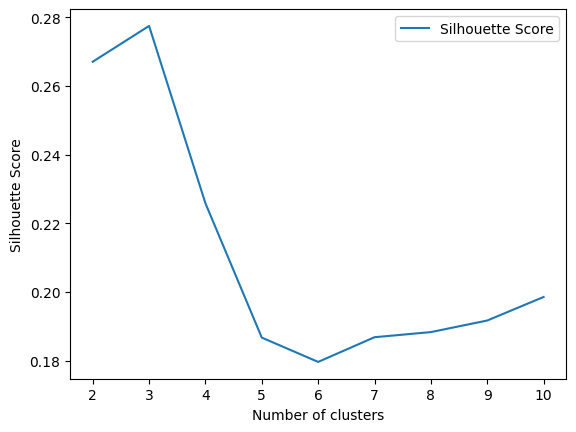

In [ ]:
# Using silhouette score
sil_scores= []

for i in range(2, 11):
  clust_ahc= AgglomerativeClustering(n_clusters= i, linkage= 'ward', metric= 'euclidean')
  y_pred_ahc= clust_ahc.fit_predict(data_scaled)
  sil_score_ahc= silhouette_score(data_scaled, y_pred_ahc)
  sil_scores.append(sil_score_ahc)

x= range(2, 11)
plt.plot(x, sil_scores, label= 'Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

In [102]:
# Appending clusters to the original dataset

data['Clusters_ahc3']= ahc_labels

clust_profile= data.drop(['Clusters_kmeans3'], axis= 1).groupby('Clusters_ahc3').mean()
clust_profile['freq'] = data.Clusters_ahc3.value_counts().sort_index()
clust_profile

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,freq
Clusters_ahc3,,,,,,,,,,,,,,
0,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034,58
1,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429,56
2,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875,64


**Insights from AHC**


*   Optimal number of clusters found to be 3
*   Silhouette score of 0.28 indicate acceptable but not ideal clustering
*   The clusters found to be somewhat similar to KMeans

## DBSCAN

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

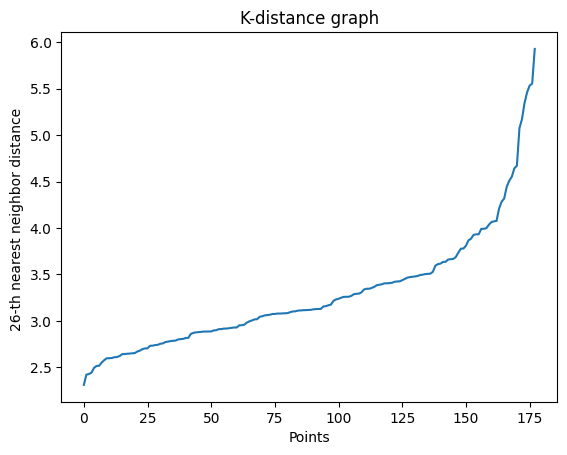

In [96]:
# Function to plot k-distance graph

def plot_k_distance_graph(X, k):
  neigh= NearestNeighbors(n_neighbors= k)
  neigh.fit(X)
  distances, _ = neigh.kneighbors(X)
  distances= np.sort(distances[:, k-1])
  plt.plot(distances)
  plt.xlabel('Points')
  plt.ylabel(f'{k}-th nearest neighbor distance ')
  plt.title('K-distance graph')
  plt.show()

# Plot k-distance graph
# k = 2*13

plot_k_distance_graph(data_scaled, 26)

The above plot gives an idea regarding the min_samples and epsilon attribute values to be provided

In [105]:
clust_dbs= DBSCAN(eps= 3, min_samples= 26)
y_pred_dbs= clust_dbs.fit_predict(data_scaled)
dbs_labels= clust_dbs.labels_

np.unique(y_pred_dbs)


array([-1,  0,  1])

In [107]:
# Appending clusters to the original dataset

data['Clusters_dbs2']= dbs_labels

clust_profile= data.drop(['Clusters_kmeans3', 'Clusters_ahc3'], axis= 1).groupby('Clusters_dbs2').mean()
clust_profile['freq'] = data.Clusters_dbs2.value_counts().sort_index()
clust_profile

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,freq
Clusters_dbs2,,,,,,,,,,,,,,
-1,12.571000,2.028000,2.337500,20.200000,110.100000,2.518500,2.122500,0.357500,2.017500,4.441000,0.980000,2.578000,616.250000,20
0,13.030982,1.938482,2.353750,18.706250,98.285714,2.531696,2.532946,0.327321,1.724821,4.329911,1.063446,2.995179,818.928571,112
1,13.113478,3.439130,2.410217,21.108696,98.782609,1.621957,0.762391,0.447826,1.079348,7.099348,0.689565,1.692609,628.304348,46


**Insights from DBSCAN**


*   Optimal number of clusters found to be 2 (0, 1) and rest mapped as noise (-1)
*   20 points has been marked as noise points by the model
*   DBSCAN truly shines when dealing with non-globular cluster shapes.